<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>Tugas 04</font><font color='#F29496'> Pemrosesan Citra Digital</font></h1>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Pemrosesan Citra Digital - B
            </font></b>
    </div>
</div>

---
<div class="alert alert-block alert-info">
    <h2>Table of Contents<a class="anchor" id="tableOfKonten"></a></h2>
    <ul>
        <li><a href="#soal">Soal</a></li>
        <li><a href="#librarii">Library</a></li>
        <li><a href="#oriImg">Original Image</a></li>
        <li><a href="#grayscale">Convert to Grayscale</a></li>
        <li><a href="#gaussAndMedian">Gaussian and Median Filter</a></li>
        <li><a href="#edgeDetector">Edge-Detector</a></li>
        <li><a href="#regionBasedSegment">Region-Based Segmentation</a></li>
        <li><a href="#binaryInverse">Binary Inverse</a></li>
        <li><a href="#append">Append two image</a></li>
        <li><a href="#wbcDetect">White Blood Cell Detection</a></li>
    </ul>
</div>

## SOAL <a class="anchor" id="soal"></a>
---

Segmentasi citra yang diberikan seperti contoh berikut:<br>
<div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=10S1aKQ86oJbLdh3Q6z3wFfB6bbeXVjpE" alt="foto" style="width:700px; height:200px">
</div><br>
Citra yang dikerjakan adalah:
<div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Xhai3ICluwbJZRx-_rNZdMdTPxkesKek" alt="foto" style="width:700px; height:280px">
</div><br>
Contoh:
<div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1OQrOGLyiaTi3JdKrf_Ci8ZjM80dybYcl" alt="foto" style="width:700px; height:200px">
</div>

## Library<a class="anchor" id="librarii"></a>
---

In [104]:
# Importing library
import numpy as np
from skimage import feature
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from scipy.ndimage import binary_fill_holes
import matplotlib.pylab as pylab
import cv2
from PIL import Image, ImageEnhance

import warnings 
warnings.filterwarnings('ignore')

## Original Image<a class="anchor" id="oriImg"></a>
---

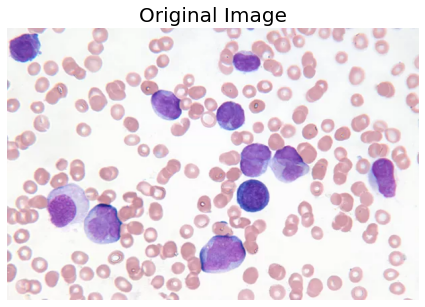

In [105]:
# Read image with RGB Color
img = cv2.cvtColor(cv2.imread('cell darah.png'), cv2.COLOR_BGR2RGB)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.imshow(img)
pylab.axis('off')
pylab.title('Original Image', fontsize=20)
pylab.show()

## Convert to Grayscale<a class="anchor" id="grayscale"></a>
---

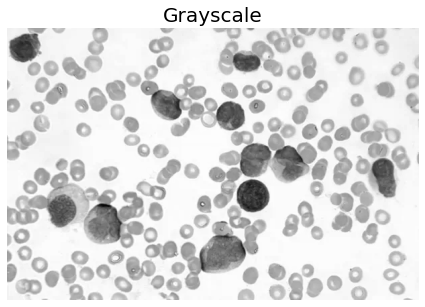

In [106]:
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.imshow(img_gray, cmap='gray')
pylab.axis('off')
pylab.title('Grayscale', fontsize=20)
pylab.show()

## Gaussian and Median Filter<a class="anchor" id="gaussAndMedian"></a>
---

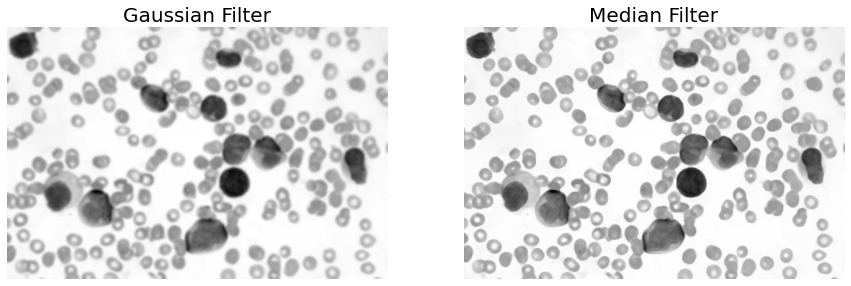

In [107]:
# Filtering using Gaussian and Median
img_gauss = cv2.GaussianBlur(img_gray, (9, 9), 0)
img_median = cv2.medianBlur(img_gray, 5)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(img_gauss, cmap='gray')
pylab.axis('off')
pylab.title('Gaussian Filter', fontsize=20)
pylab.subplot(122)
pylab.imshow(img_median, cmap='gray')
pylab.axis('off')
pylab.title('Median Filter', fontsize=20)
pylab.show()

## Contrast<a class="anchor" id="contrast"></a>
---

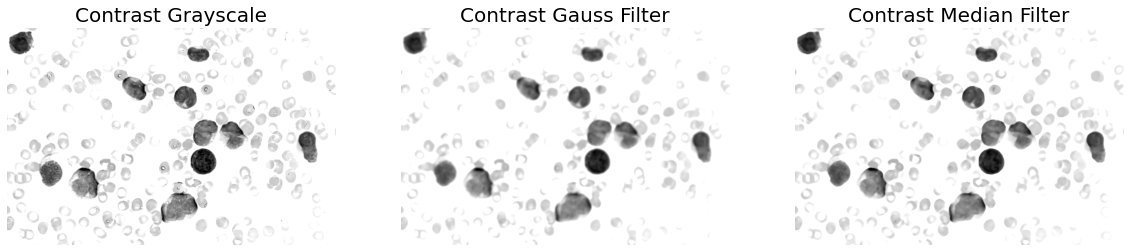

In [108]:
# contrast stretching
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

    
# Define parameters.
r1 = 70
s1 = 0
r2 = 200
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img_gray, r1, s1, r2, s2)
contrast_stretched_gauss = pixelVal_vec(img_gauss, r1, s1, r2, s2)
contrast_stretched_median = pixelVal_vec(img_median, r1, s1, r2, s2)

# Save image
cv2.imwrite('contrast_stretch_gauss.png', contrast_stretched_gauss)
cv2.imwrite('contrast_stretch_median.png', contrast_stretched_median)

# Displaying image
pylab.figure(figsize=(20,10))
pylab.subplot(131)
pylab.imshow(contrast_stretched, cmap='gray')
pylab.axis('off')
pylab.title('Contrast Grayscale', fontsize=20)
pylab.subplot(132)
pylab.imshow(contrast_stretched_gauss, cmap='gray')
pylab.axis('off')
pylab.title('Contrast Gauss Filter', fontsize=20)
pylab.subplot(133)
pylab.imshow(contrast_stretched_median, cmap='gray')
pylab.axis('off')
pylab.title('Contrast Median Filter', fontsize=20)
pylab.show()

## Edge-Detector<a class="anchor" id="edgeDetector"></a>
---

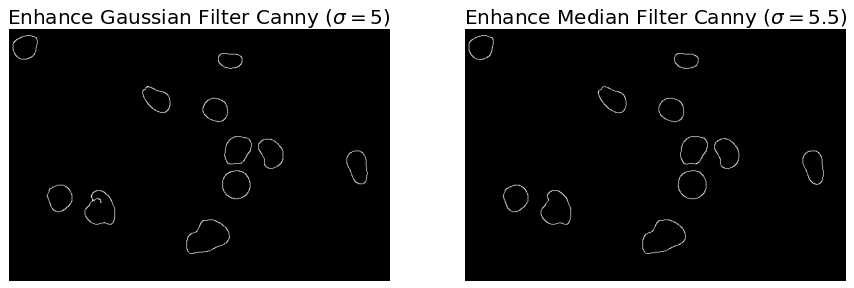

In [109]:
# Read image enhance
img_enhance_gauss = imread('contrast_stretch_gauss.png')
img_enhance_median = imread('contrast_stretch_median.png')

# Edge-detector using Canny
img_enhance_gauss_canny = feature.canny(img_enhance_gauss, sigma=5)
img_enhance_median_canny = feature.canny(img_enhance_median, sigma=5.5)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(img_enhance_gauss_canny, cmap='gray')
pylab.axis('off')
pylab.title('Enhance Gaussian Filter Canny (' + r'$\sigma=5$' + ')', fontsize=20)
pylab.subplot(122)
pylab.imshow(img_enhance_median_canny, cmap='gray')
pylab.axis('off')
pylab.title('Enhance Median Filter Canny (' + r'$\sigma=5.5$' + ')', fontsize=20)
pylab.show()

## Region-Based Segmentation<a class="anchor" id="regionBasedSegment"></a>
---

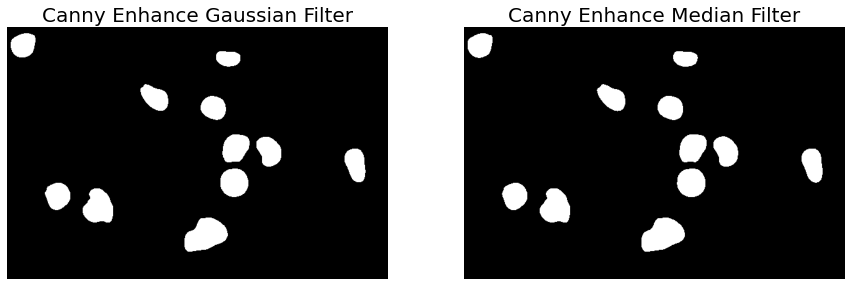

In [110]:
# region-based segmentation
img_gauss_segment = binary_fill_holes(img_enhance_gauss_canny)
img_median_segment = binary_fill_holes(img_enhance_median_canny)

# Save image
imsave('img_median_segment.png', img_median_segment)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(img_gauss_segment, cmap='gray')
pylab.axis('off')
pylab.title('Canny Enhance Gaussian Filter', fontsize=20)
pylab.subplot(122)
pylab.imshow(img_median_segment, cmap='gray')
pylab.axis('off')
pylab.title('Canny Enhance Median Filter', fontsize=20)
pylab.show()

## Binary Inverse<a class="anchor" id="binaryInverse"></a>
---

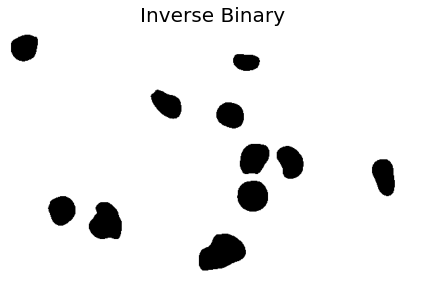

In [111]:
# Read image with grayscale
img_median = cv2.imread("img_median_segment.png", cv2.IMREAD_GRAYSCALE);

# Inverse binary
th, img_median_segment_inverse = cv2.threshold(img_median, 220, 255, cv2.THRESH_BINARY_INV);

# Save image
cv2.imwrite('img_median_segment_inv.png', img_median_segment_inverse)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.imshow(img_median_segment_inverse, cmap='gray')
pylab.axis('off')
pylab.title('Inverse Binary', fontsize=20)
pylab.show()

## Append two image<a class="anchor" id="append"></a>
---

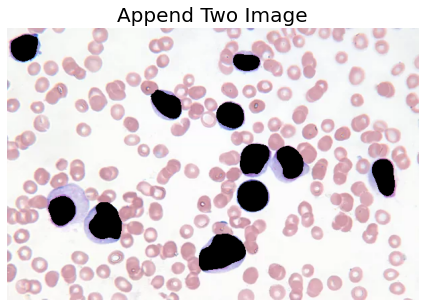

In [112]:
# Read image
img_cell = Image.open("cell darah.png")
img_median_binaryInv = Image.open("img_median_segment_inv.png")

# Convert to RGBA
img_cell = img_cell.convert("RGBA")
img_median_binaryInv = img_median_binaryInv.convert("RGBA")

# Append img_cell with img_median_binaryInv
datas = img_median_binaryInv.getdata()
newData = []

for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
    else:
            newData.append(item)
img_median_binaryInv.putdata(newData)

img_cell_copy = img_cell.copy()
img_cell_copy.paste(img_median_binaryInv, (0,0), img_median_binaryInv)

img_cell_copy.save('cell-darah-putih-detect.png')

# Displaying image
pylab.figure(figsize=(15,5))
pylab.imshow(img_cell_copy, cmap='gray')
pylab.axis('off')
pylab.title('Append Two Image', fontsize=20)
pylab.show()

## White Blood Cell Detection<a class="anchor" id="wbcDetect"></a>
---

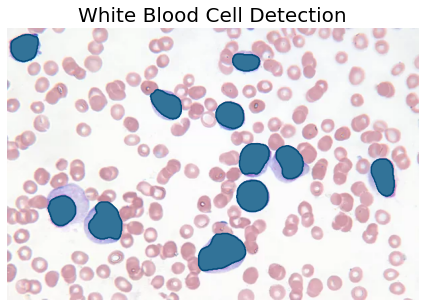

In [113]:
# Load the aerial image and convert to HSV colourspace
image = cv2.cvtColor(cv2.imread("cell-darah-putih-detect.png"), cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# Define lower and uppper limits of what we call "black"
lower_black = np.array([0,0,0], dtype = "uint16")
upper_black = np.array([70,70,70], dtype = "uint16")

# Mask image to only select black
mask=cv2.inRange(image,lower_black,upper_black)

# Change image to blue where we found black
image[mask>0]=(50,115,152)

# Displaying image
pylab.figure(figsize=(15,5))
pylab.imshow(image, cmap='gray')
pylab.contour(img_median_segment, [0.5], linewidths=1.5, colors='#054d7a')
pylab.axis('off')
pylab.title('White Blood Cell Detection', fontsize=20)
pylab.show()

<div style=" text-align: center; margin-top: 50px;">
    <a class="button" 
       href="#tableOfKonten" 
       style="border: none; 
          background-color: inherit;
          padding: 7px 14px;
          font-size: 16px;
          border-radius: 11px;
          cursor: pointer;
          display: inline-block;
          background-color: dodgerblue;
          color: white;">
        Kembali ke "Table of Contents"
    </a><br>
    <h5 style="color:gray;
               margin-top: 30px;">
        Iman Mustika Ismail ©2022
    </h5>
</div>